In [37]:
import numpy as np
from collections import Counter
from IPython.display import Image
import subprocess

from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, log_loss

#classifiers
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

# random state
seed = 104

In [4]:
X,y = make_classification(n_samples=1000,n_features=20,n_redundant=3,n_informative=8,n_repeated=2,random_state=seed)

In [7]:
y[0:5]

array([0, 1, 0, 0, 0])

In [8]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

In [11]:
Counter(y_train), Counter(y_test)

(Counter({0: 396, 1: 404}), Counter({0: 106, 1: 94}))

In [13]:
dt = DecisionTreeClassifier(random_state=seed)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=104,
            splitter='best')

In [14]:
dt.score(X_test,y_test)

0.85499999999999998

In [15]:
accuracy_score(y_test,dt.predict(X_test))

0.85499999999999998

In [16]:
log_loss(y_test,dt.predict_proba(X_test))

5.008122577262049

In [17]:
dt.tree_.node_count

143

In [30]:
dt.predict_proba(X_test)[:5]

array([[ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [32]:
export_graphviz(dt,out_file="dt.dot")

In [33]:
command = ["dot","-Tpng","dt.dot","-o","dt.png"]

In [35]:
subprocess.check_call(command)

0

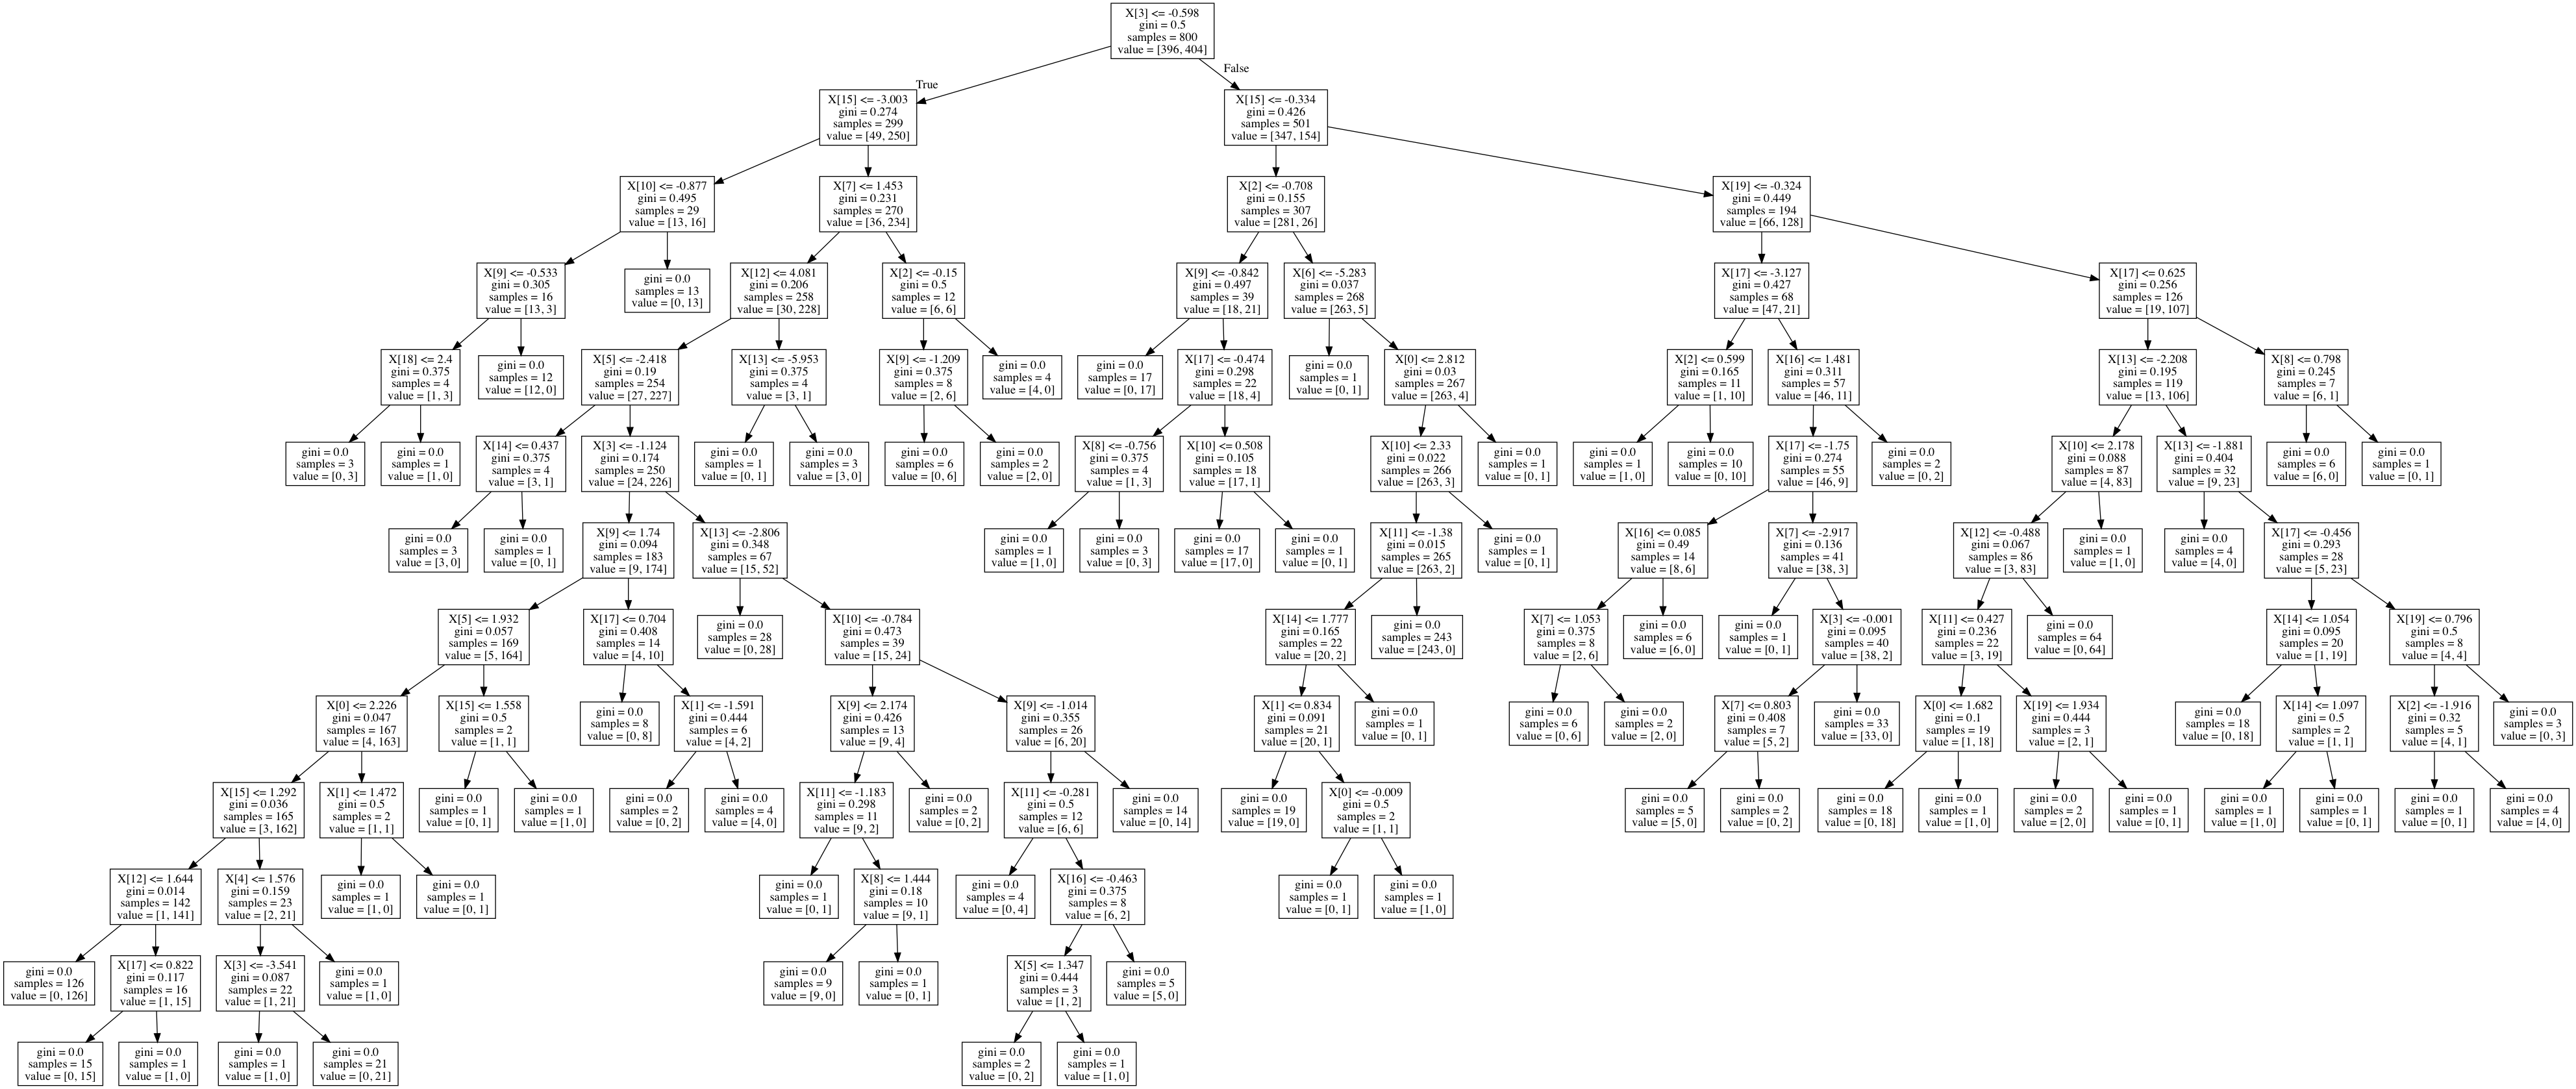

In [38]:
Image("dt.png")

In [39]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),n_estimators=1000,algorithm="SAMME",random_state=seed)

In [40]:
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=104)

In [41]:
ada.score(X_test,y_test)

0.84499999999999997

In [42]:
log_loss(y_test, ada.predict_proba(X_test))

0.68320879228341946

In [43]:
ada.predict_proba(X_test)[:10]

array([[ 0.48396329,  0.51603671],
       [ 0.49868559,  0.50131441],
       [ 0.49892766,  0.50107234],
       [ 0.50151698,  0.49848302],
       [ 0.50566436,  0.49433564],
       [ 0.49596524,  0.50403476],
       [ 0.50715619,  0.49284381],
       [ 0.50458761,  0.49541239],
       [ 0.49543632,  0.50456368],
       [ 0.49849406,  0.50150594]])

In [44]:
ada.predict(X_test)[:10]

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [48]:
ada.estimators_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=534042305, splitter='best')

In [49]:
gb = GradientBoostingClassifier(max_depth=1,n_estimators=1000,random_state=seed)

gb.fit(X_train,y_train)

gb.score(X_test,y_test)

0.84499999999999997

In [54]:
log_loss(y_test, gb.predict_proba(X_test))

0.3404427404748685

In [55]:
print(gb.predict_proba(X_test)[:10])

print(gb.predict(X_test)[:10])

print(gb.estimators_[0])

[[ 0.12344095  0.87655905]
 [ 0.69217302  0.30782698]
 [ 0.83598136  0.16401864]
 [ 0.9159873   0.0840127 ]
 [ 0.99863653  0.00136347]
 [ 0.05956931  0.94043069]
 [ 0.99694857  0.00305143]
 [ 0.96136966  0.03863034]
 [ 0.35400577  0.64599423]
 [ 0.92010397  0.07989603]]
[1 0 0 0 0 1 0 0 1 0]
[ DecisionTreeRegressor(criterion='friedman_mse', max_depth=1,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x1a119feb40>,
           splitter='best')]
